In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# we want to cluster circutes and las that are similar to each other so a driver could make his position better by pitting at the right time

In [45]:
pit_stop = pd.read_csv("../Scraping/f1db_csv/pit_stops.csv")
lap_time = pd.read_csv("../Scraping/f1db_csv/lap_times.csv")

In [46]:
pit_stop.head()


,raceId,driverId,stop,lap,time,duration,milliseconds
0,841,153,1,1,17:05:23,26.898,26898
1,841,30,1,1,17:05:52,25.021,25021
2,841,17,1,11,17:20:48,23.426,23426
3,841,4,1,12,17:22:34,23.251,23251
4,841,13,1,13,17:24:10,23.842,23842


In [47]:
lap_time.head()

,raceId,driverId,lap,position,time,milliseconds
0,841,20,1,1,1:38.109,98109
1,841,20,2,1,1:33.006,93006
2,841,20,3,1,1:32.713,92713
3,841,20,4,1,1:32.803,92803
4,841,20,5,1,1:32.342,92342


In [48]:
merged_df = pd.merge(merged_df1, lap_time, on=["raceId","lap","driverId"])

In [49]:
merged_df

,raceId,driverId,stop,lap,time_x,duration,milliseconds_x,driverRef,number,code,forename,surname,dob,nationality,url,position,time_y,milliseconds_y
0,841,153,1,1,17:05:23,26.898,26898,alguersuari,\N,ALG,Jaime,Alguersuari,1990-03-23,Spanish,http://en.wikipedia.org/wiki/Jaime_Alguersuari,21,2:13.879,133879
1,841,153,2,17,17:31:06,24.463,24463,alguersuari,\N,ALG,Jaime,Alguersuari,1990-03-23,Spanish,http://en.wikipedia.org/wiki/Jaime_Alguersuari,17,1:57.713,117713
2,841,153,3,35,17:59:45,26.348,26348,alguersuari,\N,ALG,Jaime,Alguersuari,1990-03-23,Spanish,http://en.wikipedia.org/wiki/Jaime_Alguersuari,14,1:58.520,118520
3,842,153,1,16,16:32:25,23.584,23584,alguersuari,\N,ALG,Jaime,Alguersuari,1990-03-23,Spanish,http://en.wikipedia.org/wiki/Jaime_Alguersuari,13,1:56.329,116329
4,842,153,2,32,17:00:55,22.888,22888,alguersuari,\N,ALG,Jaime,Alguersuari,1990-03-23,Spanish,http://en.wikipedia.org/wiki/Jaime_Alguersuari,12,1:51.898,111898
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10047,1107,857,3,22,15:31:40,29.912,29912,piastri,81,PIA,Oscar,Piastri,2001-04-06,Australian,http://en.wikipedia.org/wiki/Oscar_Piastri,17,1:17.056,77056
10048,1107,857,4,41,15:54:36,22.313,22313,piastri,81,PIA,Oscar,Piastri,2001-04-06,Australian,http://en.wikipedia.org/wiki/Oscar_Piastri,15,1:14.404,74404
10049,1108,857,1,29,15:48:05,28.655,28655,piastri,81,PIA,Oscar,Piastri,2001-04-06,Australian,http://en.wikipedia.org/wiki/Oscar_Piastri,3,1:32.563,92563
10050,1109,857,1,18,15:28:39,21.171,21171,piastri,81,PIA,Oscar,Piastri,2001-04-06,Australian,http://en.wikipedia.org/wiki/Oscar_Piastri,2,1:27.253,87253


In [50]:
for _ in merged_df.columns:
    print(merged_df[_].unique())

[ 841  842  843  844  845  846  847  848  849  850  851  853  854  855
  856  857  858  859  852  861  862  863  864  865  866  867  868  869
  870  871  872  873  874  875  876  877  878  879  860  880  881  882
  883  884  885  886  887  888  890  891  892  893  894  895  896  897
  898  899  900  901  902  903  904  905  906  907  908  909  910  911
  912  913  914  915  916  917  918  927  928  929  930  931  932  934
  936  937  938  939  940  941  942  944  945  948  950  951  952  953
  954  955  956  957  958  959  960  961  962  963  964  965  966  967
  968  969  970  971  973  975  976  978  979  980  981  982  983  984
  985  986  987  988  989  990  991  992  993  994  995  996  997  998
  999 1000 1003 1004 1005 1008 1009 1052 1053 1054 1055 1056 1057 1059
 1058 1060 1061 1062 1064 1065 1066 1067 1069 1070 1071 1051 1072 1073
 1074 1075 1076 1078 1079 1080 1081 1082 1083 1084 1085 1086 1087 1088
 1092 1093 1094 1095 1096 1098 1099 1100 1101 1102 1104 1105 1106 1107
 1108 

In [51]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10052 entries, 0 to 10051
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   raceId          10052 non-null  int64 
 1   driverId        10052 non-null  int64 
 2   stop            10052 non-null  int64 
 3   lap             10052 non-null  int64 
 4   time_x          10052 non-null  object
 5   duration        10052 non-null  object
 6   milliseconds_x  10052 non-null  int64 
 7   driverRef       10052 non-null  object
 8   number          10052 non-null  object
 9   code            10052 non-null  object
 10  forename        10052 non-null  object
 11  surname         10052 non-null  object
 12  dob             10052 non-null  object
 13  nationality     10052 non-null  object
 14  url             10052 non-null  object
 15  position        10052 non-null  int64 
 16  time_y          10052 non-null  object
 17  milliseconds_y  10052 non-null  int64 
dtypes: int

In [52]:
merged_df.drop(['url','nationality','dob','number','driverRef','forename','surname','time_x','time_y','duration','code'], axis=1, inplace=True)
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10052 entries, 0 to 10051
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   raceId          10052 non-null  int64
 1   driverId        10052 non-null  int64
 2   stop            10052 non-null  int64
 3   lap             10052 non-null  int64
 4   milliseconds_x  10052 non-null  int64
 5   position        10052 non-null  int64
 6   milliseconds_y  10052 non-null  int64
dtypes: int64(7)
memory usage: 549.8 KB


In [53]:
merged_df.rename(columns={'milliseconds_x':'pit_stop_time','milliseconds_y':'total_lap_time'}, inplace=True)

In [54]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10052 entries, 0 to 10051
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   raceId          10052 non-null  int64
 1   driverId        10052 non-null  int64
 2   stop            10052 non-null  int64
 3   lap             10052 non-null  int64
 4   pit_stop_time   10052 non-null  int64
 5   position        10052 non-null  int64
 6   total_lap_time  10052 non-null  int64
dtypes: int64(7)
memory usage: 549.8 KB


In [55]:
merged_df.head()

,raceId,driverId,stop,lap,pit_stop_time,position,total_lap_time
0,841,153,1,1,26898,21,133879
1,841,153,2,17,24463,17,117713
2,841,153,3,35,26348,14,118520
3,842,153,1,16,23584,13,116329
4,842,153,2,32,22888,12,111898


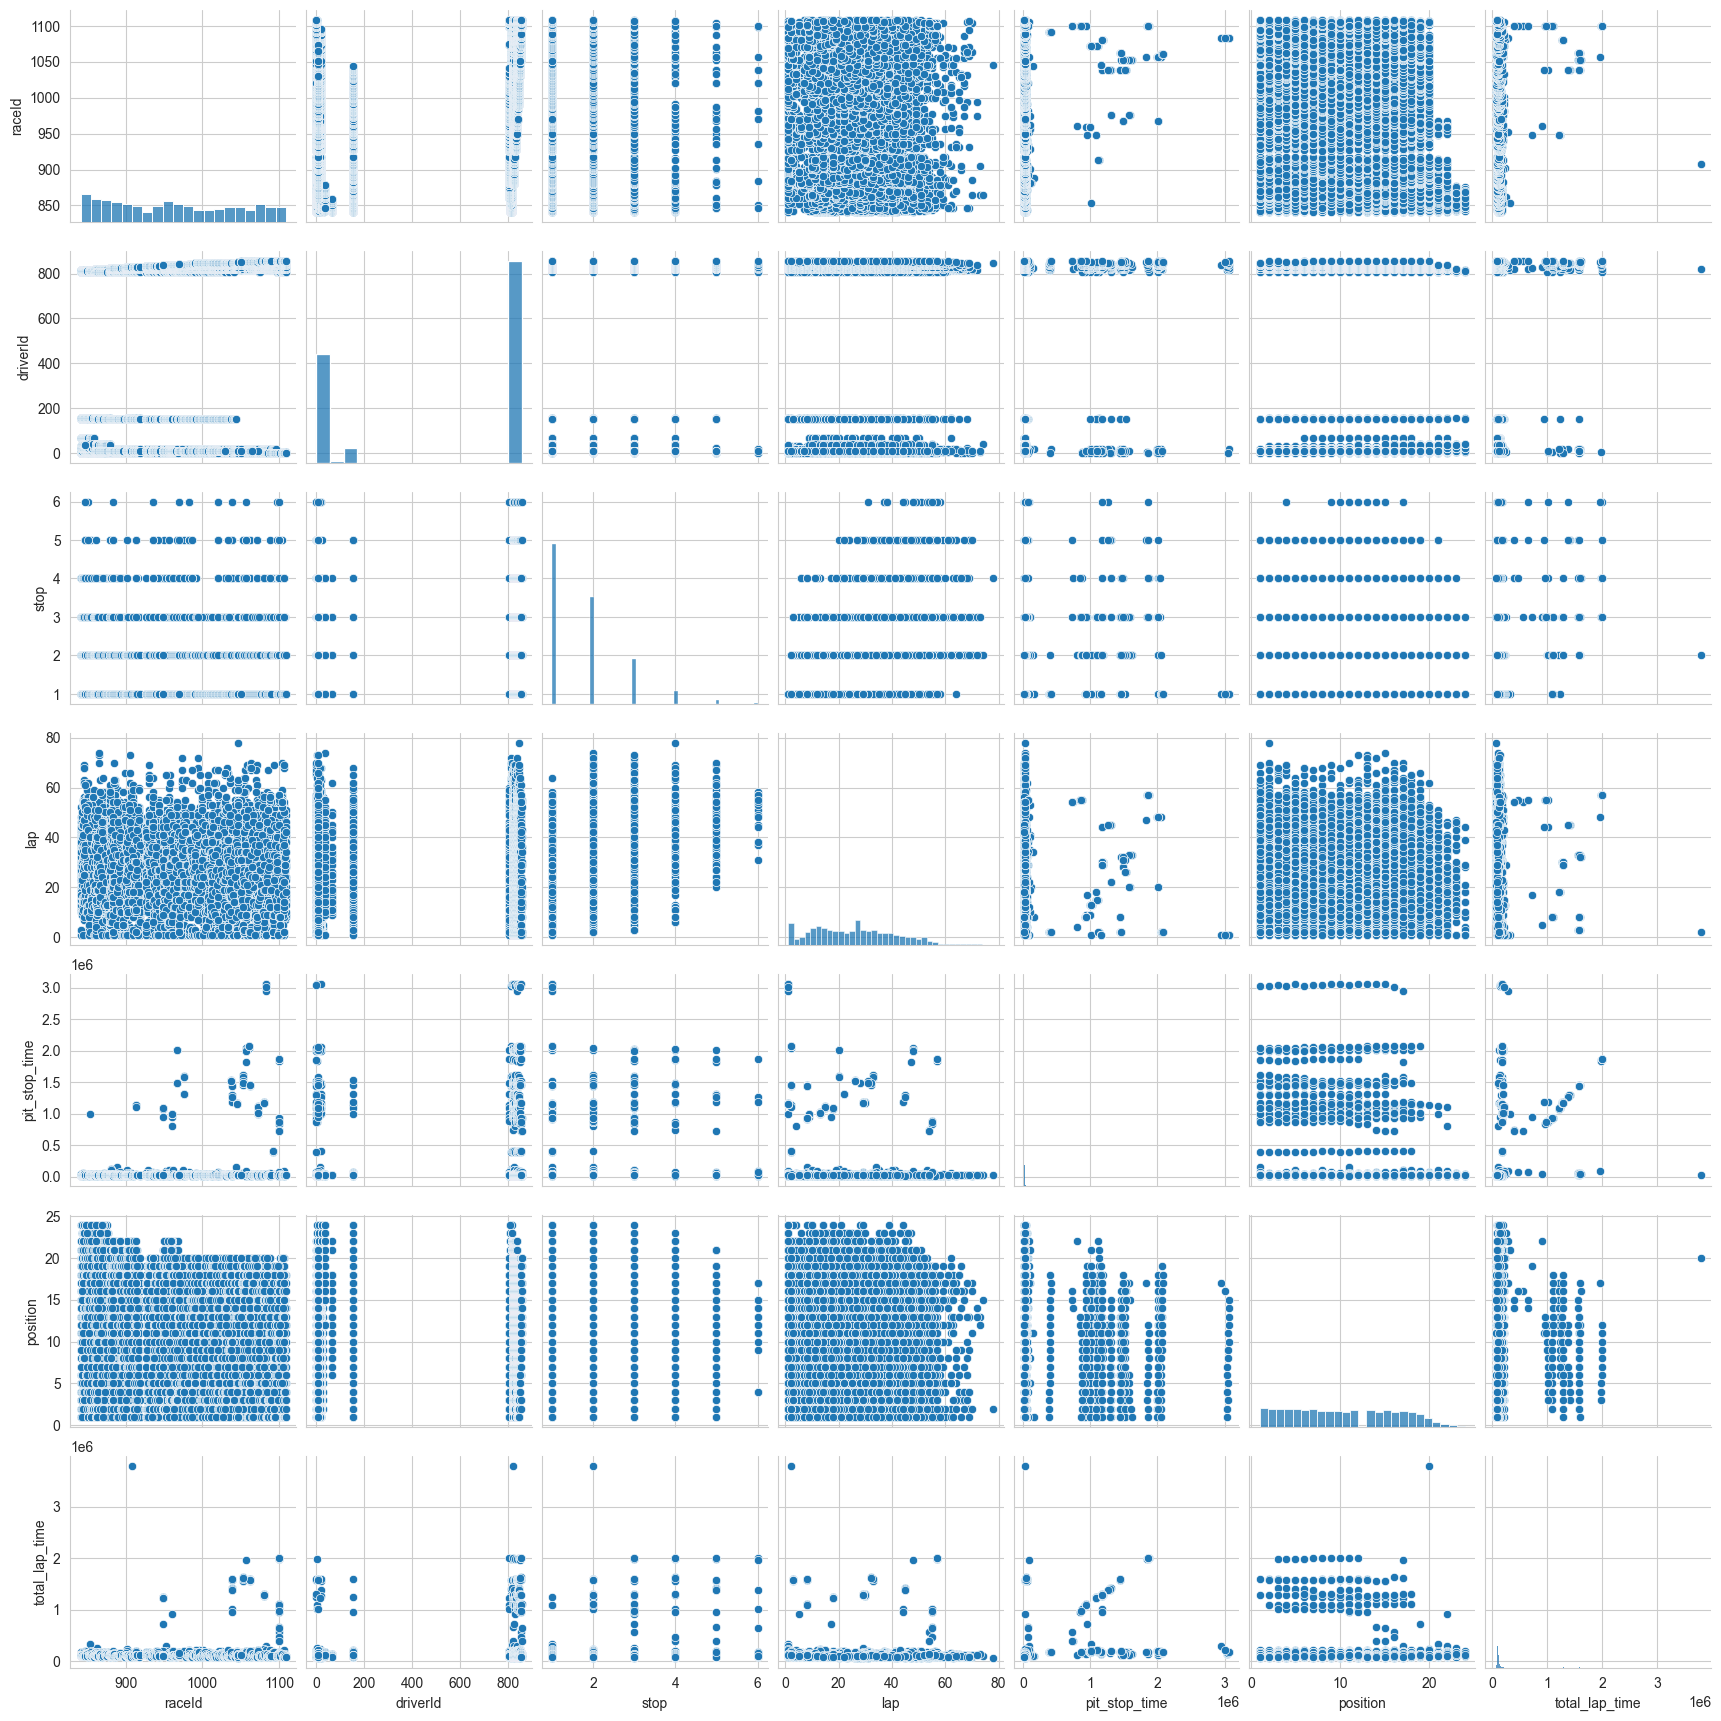

In [ ]:
sns.pairplot(merged_df)

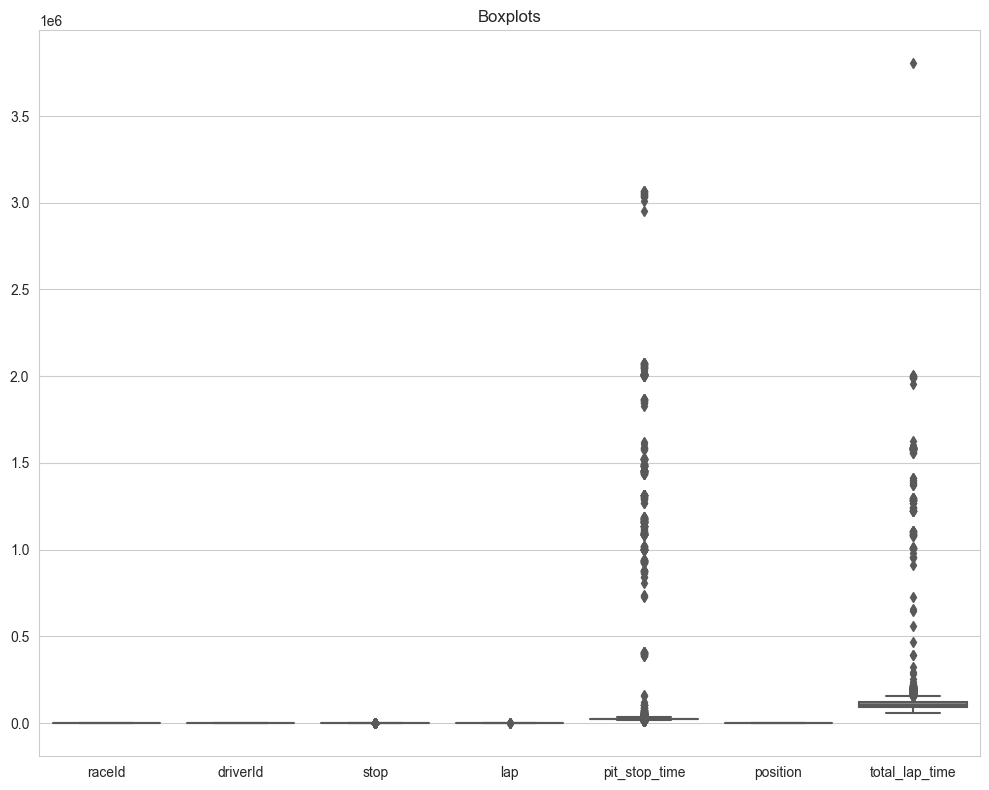

In [63]:
plt.figure(figsize=(10,8)) 

sns.boxplot(data=merged_df, palette='coolwarm')

plt.title('Boxplots')

plt.tight_layout() 
plt.show()

# we can see that there are a lot of different types of distributions but we cant see them well so we will use the log funcition to see them better

In [64]:
log_data = np.log(merged_df)

In [ ]:
sns.pairplot(log_data)

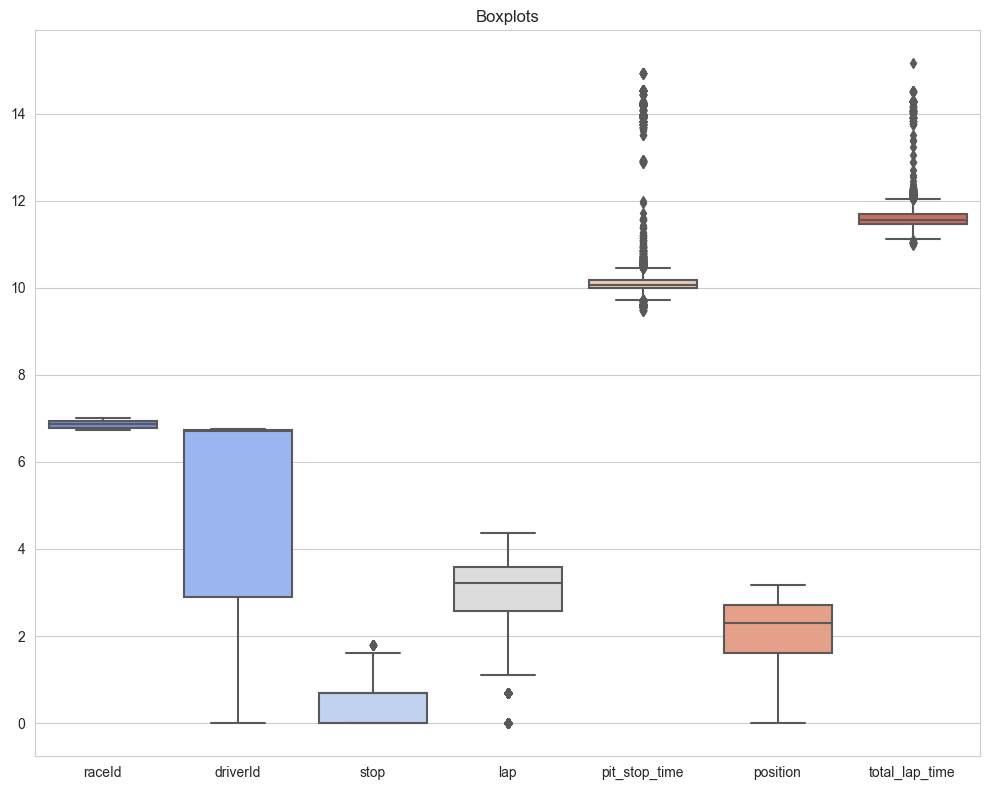

In [66]:
plt.figure(figsize=(10,8)) 

sns.boxplot(data=log_data, palette='coolwarm')

plt.title('Boxplots')

plt.tight_layout() 
plt.show()

# outliers for each feature

In [68]:
for feature in log_data.keys():
    q1 = log_data[feature].quantile(0.25)
    q3 = mergedf[feature].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    print(f'Feature: {feature}')
    print(f'Lower bound: {lower_bound}')
    print(f'Upper bound: {upper_bound}')
    print('\n')

Feature: raceId
Lower bound: 6.559278752094491
Upper bound: 7.168788699334728


Feature: driverId
Lower bound: -2.858015297542761
Upper bound: 12.471016850294374


Feature: stop
Lower bound: -1.0397207708399179
Upper bound: 1.732867951399863


Feature: lap
Lower bound: 1.037094985969677
Upper bound: 5.11137330994797


Feature: pit_stop_time
Lower bound: 9.724443485635383
Upper bound: 10.444879913017324


Feature: position
Lower bound: -0.03848052056806428
Upper bound: 4.355968634104375


Feature: total_lap_time
Lower bound: 11.105194669952017
Upper bound: 12.037887983140894


In [69]:
for feature in log_data.keys():
    print('Outliers of feature - '+feature + " :")
    Q1 = np.percentile(log_data[feature],25)
    Q3 = np.percentile(log_data[feature],75)
    step = 1.5*(Q3-Q1)
    outlier_pts = log_data[~((log_data[feature] >=Q1-step) & (log_data[feature] <=Q3+step))]
    all_outliers = np.append(all_outliers,outlier_pts.index.values)
    print(outlier_pts)

Outliers of feature - raceId :
Empty DataFrame
Columns: [raceId, driverId, stop, lap, pit_stop_time, position, total_lap_time]
Index: []
Outliers of feature - driverId :
Empty DataFrame
Columns: [raceId, driverId, stop, lap, pit_stop_time, position, total_lap_time]
Index: []
Outliers of feature - stop :
         raceId  driverId      stop       lap  pit_stop_time  position  \
961    6.877296  2.564949  1.791759  3.871201      10.022026  2.564949   
984    6.889591  2.564949  1.791759  3.610918      10.297925  2.564949   
1415   6.946014  2.995732  1.791759  3.806662      14.051839  2.484907   
1776   6.746412  0.000000  1.791759  4.025352       9.485925  1.386294   
1940   6.841615  0.000000  1.791759  3.988984       9.715892  2.484907   
2079   6.927558  0.000000  1.791759  4.025352       9.883795  2.708050   
2857   6.741701  2.890372  1.791759  3.931826      10.074959  2.302585   
3505   6.877296  6.703188  1.791759  3.891820      10.042336  2.197225   
3955   6.841615  6.700731  1.

In [70]:
print(all_outliers)

[  961.   984.  1415. ... 10034. 10036. 10037.]


In [71]:
len(all_outliers)

3774

In [72]:
all_outliers2,indices = np.unique(all_outliers,return_inverse=True)
print(all_outliers2, '\n' ,len(all_outliers2))

[    0.    39.    43. ... 10036. 10037. 10045.] 
 1288


In [73]:
print(indices, '\n', len(indices))

[  75   82  119 ... 1284 1285 1286] 
 3774


In [74]:
counts = np.bincount(indices)
counts

array([2, 2, 2, ..., 4, 4, 2])

In [75]:
outliers = all_outliers2[counts>1]


In [76]:
outliers

array([    0.,    39.,    43., ..., 10036., 10037., 10045.])

In [77]:
good_data = log_data.drop(outliers)

In [78]:
len(good_data)

8764

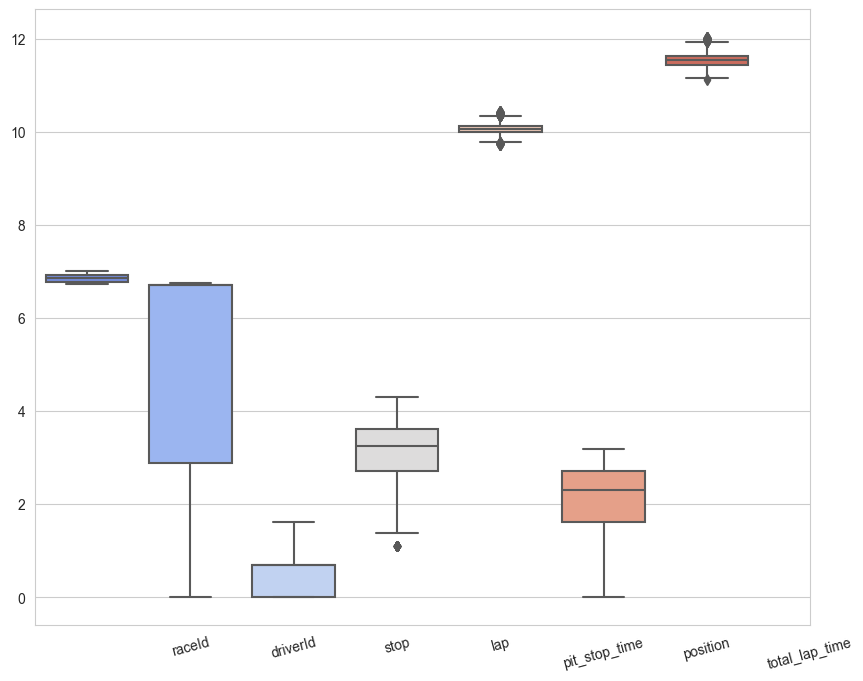

In [83]:
fig = plt.figure(figsize=(10,8))
sns.boxplot(good_data,palette='coolwarm')
plt.xticks(range(1,8),good_data.columns,rotation=15)
plt.show()

In [125]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5).fit(good_data)
pca_samples = pca.transform(good_data)

In [126]:
pca_samples

array([[-0.13708605, -0.81699359,  0.11243443,  0.31222088,  0.06401185],
       [-0.10475103, -0.61910523, -0.71214734,  0.29935197,  0.15163618],
       [-0.10655856, -0.50762152,  0.52901532, -0.21575915,  0.08658606],
       ...,
       [-1.62003452,  1.20561926,  0.01389512, -0.42206801,  0.09886328],
       [-1.56696087,  1.58831662,  0.41866415, -0.14275748, -0.16589828],
       [-1.61139491,  1.1815616 , -0.66831873, -0.02870773, -0.12830964]])

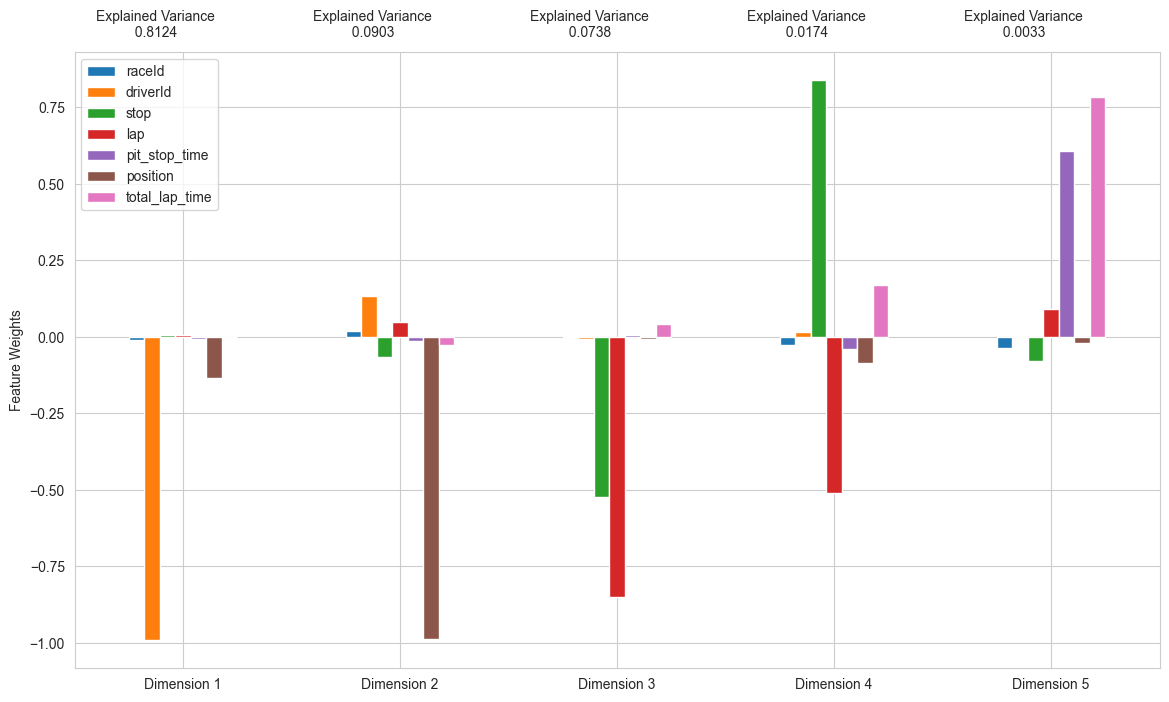

In [127]:
import visuals as vs
pca_results = vs.pca_results(good_data,pca)

# we can see that the major of the dimenstions are based on who is the driver, what was his position, what lap he was and how many stops he has done

In [129]:
reduced_data = pca.transform(good_data)
pca_samples = pca.transform(log_data)
reduced_data = pd.DataFrame(reduced_data,columns=['Dimension 1','Dimension 2','Dimension 3','Dimension 4','Dimension 5'])

<Axes: title={'center': 'PC plane with original feature projections.'}, xlabel='Dimension 1', ylabel='Dimension 2'>

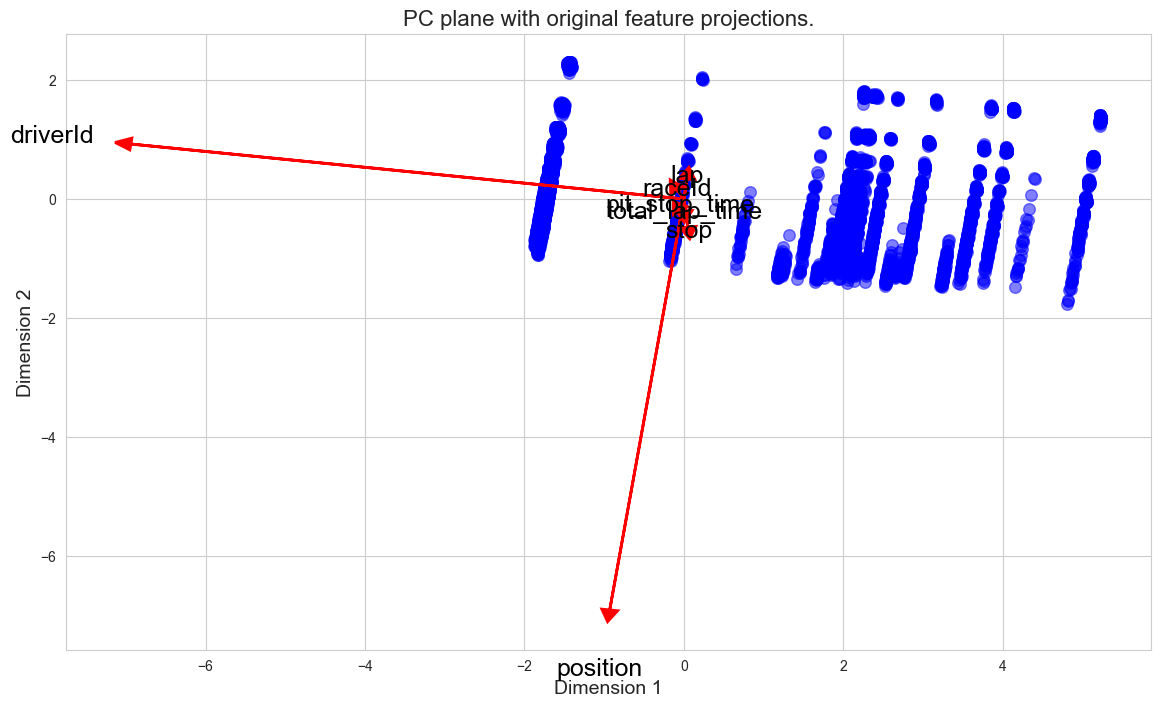

In [130]:
vs.biplot(good_data,reduced_data,pca)

In [133]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

In [134]:
x = good_data.values
kmeans = KMeans(n_clusters=4,init='k-means++',random_state=42)
y_kmeans = kmeans.fit_predict(x)

In [135]:
kmeans.cluster_centers_

array([[ 6.81451844,  2.64182745,  0.47988756,  3.12400065, 10.05889769,
         1.9946905 , 11.55764   ],
       [ 6.88727107,  6.6046834 ,  0.06535287,  2.61916759, 10.08392349,
         2.09077677, 11.55608793],
       [ 6.83561574,  0.66335302,  0.45565534,  3.15639242, 10.0446445 ,
         1.10103696, 11.5351852 ],
       [ 6.87725413,  6.59527287,  0.75692935,  3.55947951, 10.08211817,
         2.31907943, 11.53356169]])

In [136]:
silhouette_score(x,y_kmeans)

0.3029998041469494

In [137]:
good_data['Clusters'] = y_kmeans

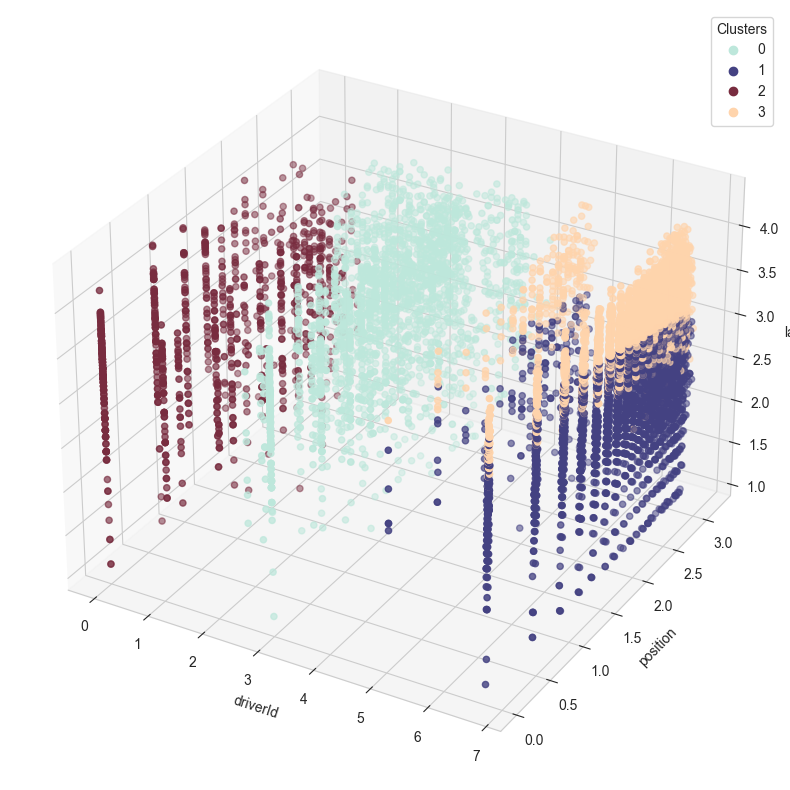

In [142]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patches as mpatches

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(good_data['driverId'],good_data['position'],good_data['lap'],c=good_data['Clusters'],cmap='icefire')
ax.set_xlabel('driverId')
ax.set_ylabel('position')
ax.set_zlabel('lap')

labels = np.unique(good_data['Clusters'])
handles = [plt.Line2D([],[],marker="o", ls="", 
                      color=scatter.cmap(scatter.norm(label))) for label in labels]
ax.legend(handles, labels, title='Clusters')

plt.show()


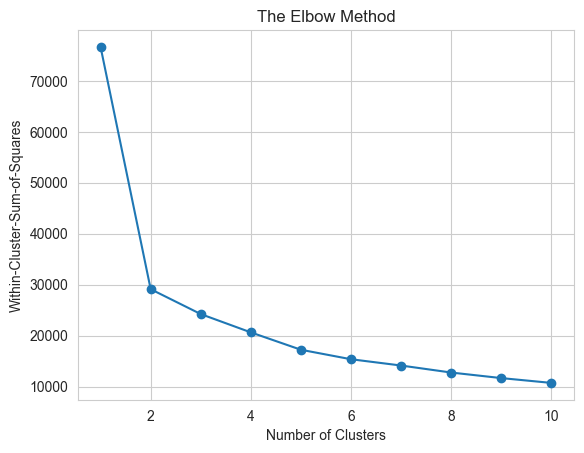

In [144]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=101)
    kmeans.fit(log_data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss,marker='o')
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Within-Cluster-Sum-of-Squares");

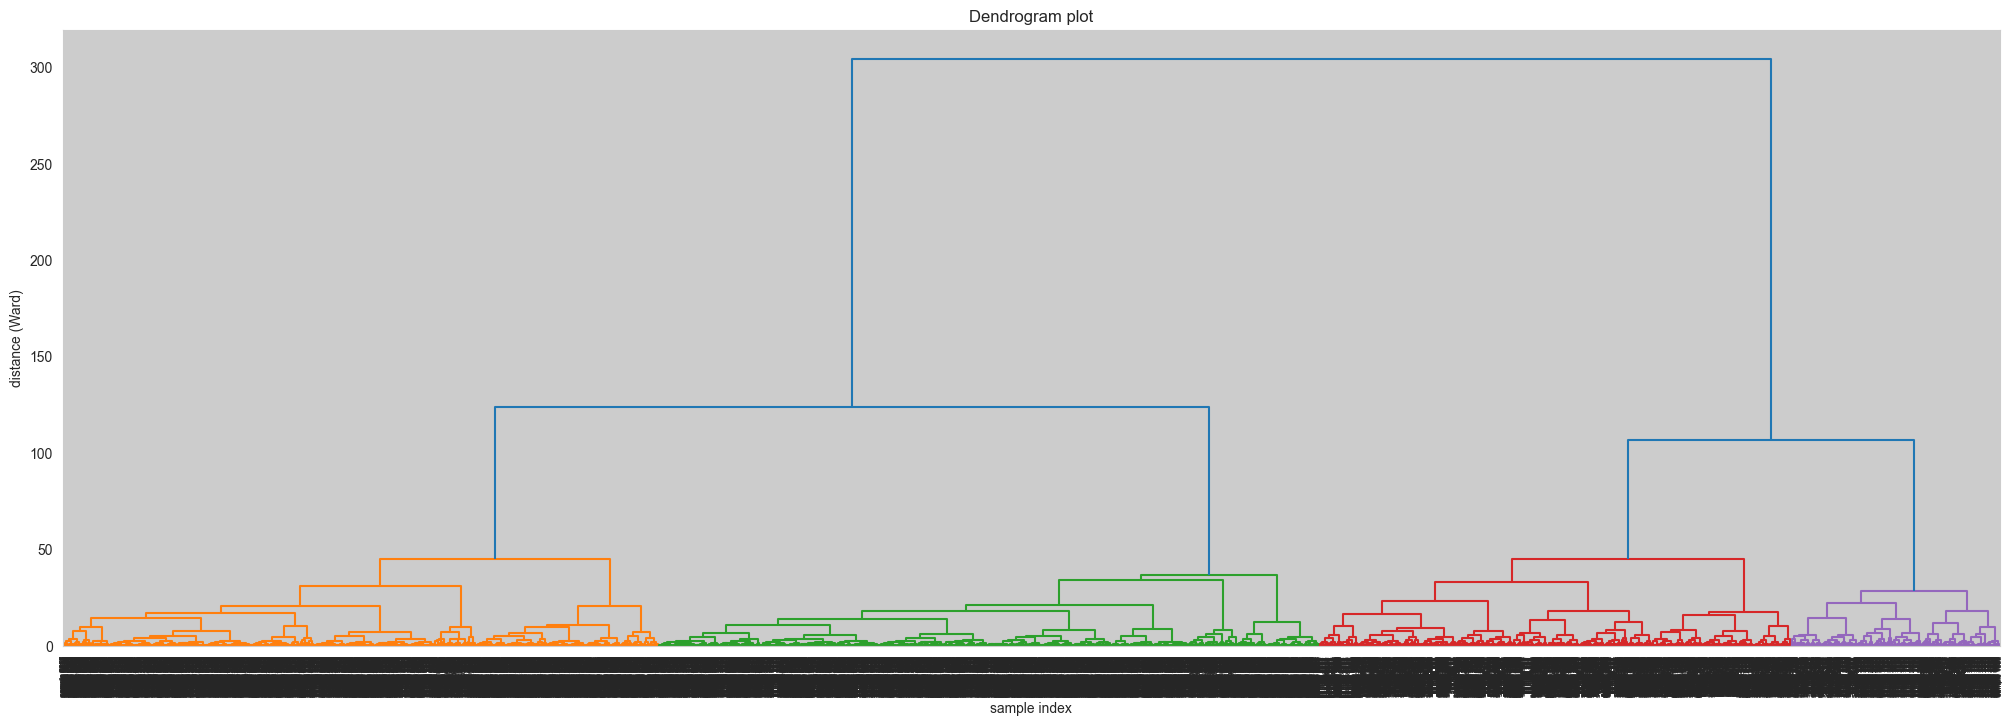

In [145]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

linked = linkage(good_data, 'ward')

plt.figure(figsize=(25, 8))

labels = [f'sample {i}' for i in range(good_data.shape[0])]

dendrogram(
    linked,
    color_threshold=100,  
    labels=labels,
    orientation='top',  
    distance_sort='descending',
    show_leaf_counts=True  
)
plt.title('Dendrogram plot')
plt.xlabel('sample index')
plt.ylabel('distance (Ward)')
plt.show()

### there are only 3 clusters

# DBSCAN

In [147]:
from numpy import unique
from numpy import where
from matplotlib import pyplot
from sklearn.datasets import make_classification
from sklearn.cluster import DBSCAN

In [148]:
data = good_data.to_numpy()  
data.shape

(8764, 8)

# lets samples a few DBSCAM parameters  

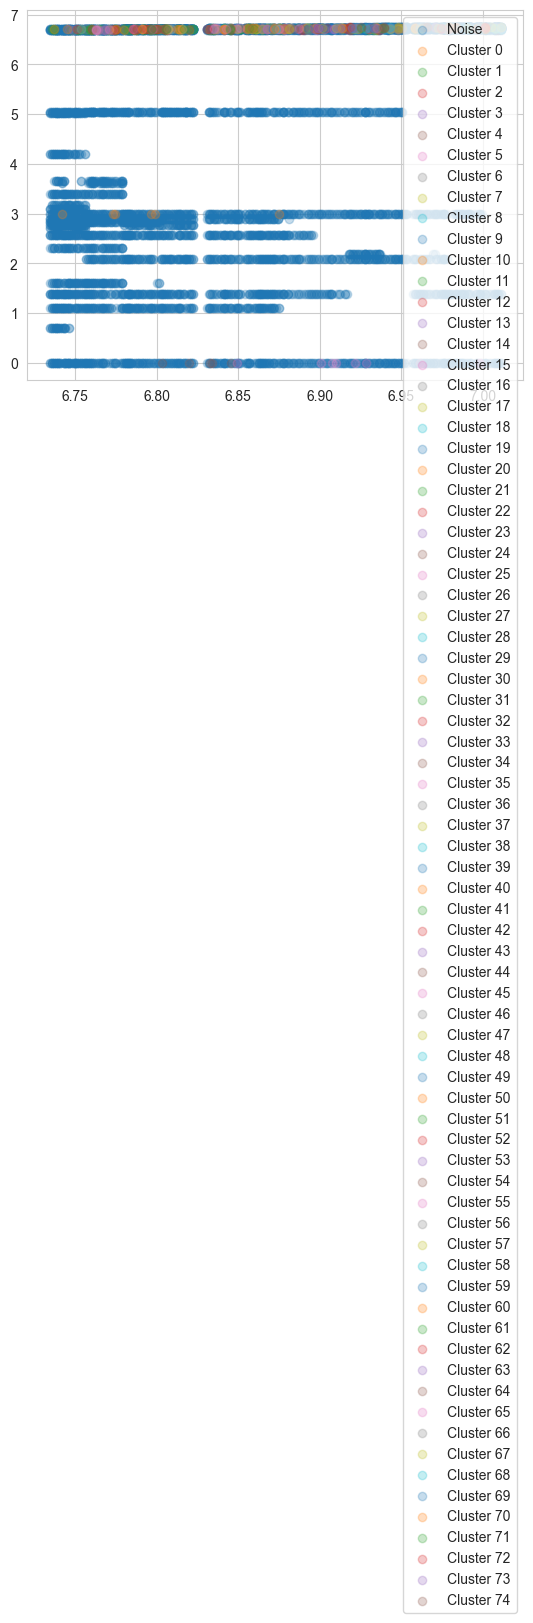

In [149]:
data = good_data.to_numpy()  
dbscan_model = DBSCAN(eps=0.1, min_samples=5)

dbscan_model.fit(data)
dbscan_labels = dbscan_model.labels_

dbscan_clusters = unique(dbscan_labels)

for cluster in dbscan_clusters:
    index = where(dbscan_labels == cluster)
    if cluster == -1: 
        label = 'Noise'
    else:
        label = f'Cluster {cluster}'
    plt.scatter(data[index, 0], data[index, 1], label=label, alpha=0.25)
    
plt.legend() 
plt.show()

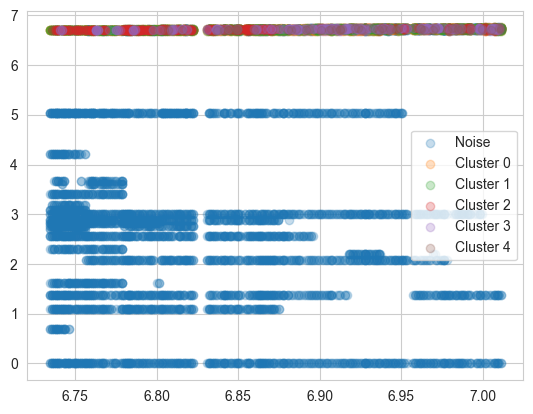

In [150]:
data = good_data.to_numpy()  
dbscan_model = DBSCAN(eps=0.25, min_samples=30)

dbscan_model.fit(data)
dbscan_labels = dbscan_model.labels_

dbscan_clusters = unique(dbscan_labels)

for cluster in dbscan_clusters:
    index = where(dbscan_labels == cluster)
    if cluster == -1:  # handling noise (outlier) cluster
        label = 'Noise'
    else:
        label = f'Cluster {cluster}'
    plt.scatter(data[index, 0], data[index, 1], label=label, alpha=0.25)
    
plt.legend() 
plt.show()

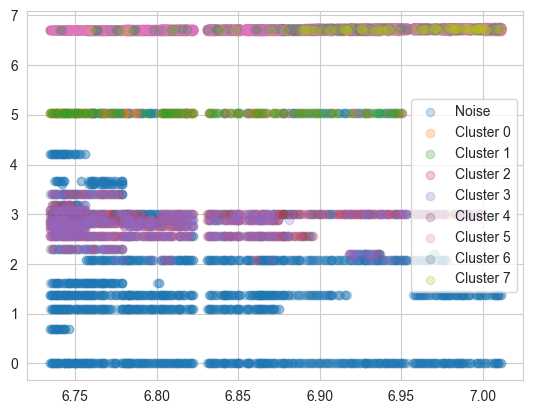

In [151]:
data = good_data.to_numpy()  
dbscan_model = DBSCAN(eps=0.5, min_samples=60)

dbscan_model.fit(data)
dbscan_labels = dbscan_model.labels_

dbscan_clusters = unique(dbscan_labels)

for cluster in dbscan_clusters:
    index = where(dbscan_labels == cluster)
    if cluster == -1:  # handling noise (outlier) cluster
        label = 'Noise'
    else:
        label = f'Cluster {cluster}'
    plt.scatter(data[index, 0], data[index, 1], label=label, alpha=0.25)
    
plt.legend() 
plt.show()

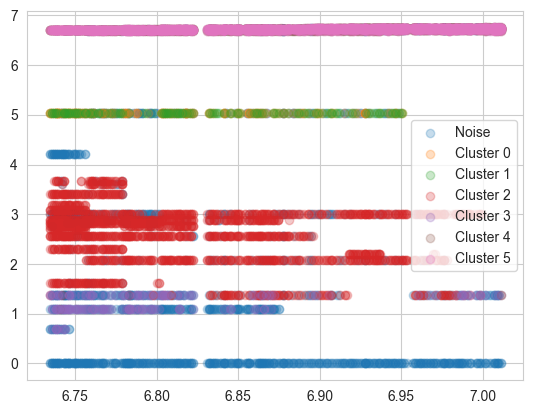

In [164]:
data = good_data.to_numpy()  
dbscan_model = DBSCAN(eps=0.7, min_samples=100)

dbscan_model.fit(data)
dbscan_labels = dbscan_model.labels_

dbscan_clusters = unique(dbscan_labels)

for cluster in dbscan_clusters:
    index = where(dbscan_labels == cluster)
    if cluster == -1:  # handling noise (outlier) cluster
        label = 'Noise'
    else:
        label = f'Cluster {cluster}'
    plt.scatter(data[index, 0], data[index, 1], label=label, alpha=0.25)
    
plt.legend() 
plt.show()

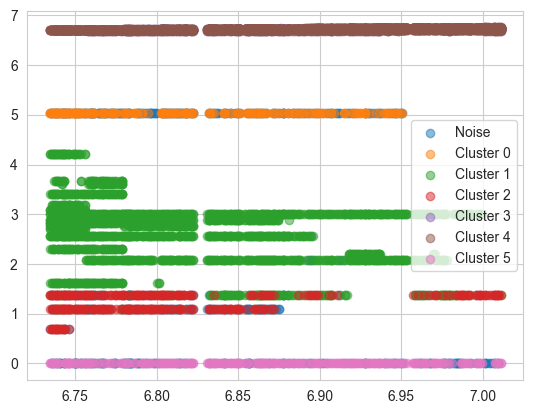

In [166]:
data = good_data.to_numpy()  
dbscan_model = DBSCAN(eps=0.9, min_samples=150)

dbscan_model.fit(data)
dbscan_labels = dbscan_model.labels_

dbscan_clusters = unique(dbscan_labels)

for cluster in dbscan_clusters:
    index = where(dbscan_labels == cluster)
    if cluster == -1:  # handling noise (outlier) cluster
        label = 'Noise'
    else:
        label = f'Cluster {cluster}'
    plt.scatter(data[index, 0], data[index, 1], label=label, alpha=0.5)
    
plt.legend() 
plt.show()

# the best result that we got is eps=0.9, min_samples=150